# Regresja liniowa

Regresja liniowa - metoda szacująca zależność liniową, pomiędzy zmiennymi niezależnymi, a zmienną zależną.

Przedstawia się ją za pomocą wzoru:

$$ y = \beta_0x_0 + \beta_1x_1 + ... + \beta_nx_n + \varepsilon $$

$y$ - zmienna zależna

$\beta_0$ - wyraz wolny (intercept_)

$x_0 = 1$

$\beta_p$ - waga/parametr modelu (coef_)

$x_p$ - zmienna niezależna

Trening modelu polega na wyznaczeniu macierzy wag $\beta$.

## Import bibliotek i wczytanie danych

Wykorzystany zostanie zbiór danych: [housing.xlsx](data/housing.xlsx) zawierający dane o domach i ich wartości.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_excel('data/housing.xlsx')
df.head()

,Przestepczosc,Mieszkaniowa,Niemieszkaniowa,PrzyRzece,TlenkiAzotu,LPokojow,WiekMieszkan,OdleglOdCentrow,DostDoMetra,Podatki,NauczUczen,AfrAmer,PracFiz,MedianowaCena
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Przygotowanie danych

Przed rozpoczęciem wyznaczania regresji liniowej, sprawdzamy czy dane nie zawierają pustych wartości, oraz czy pracujemy na liczbach.

In [129]:
df.isnull().sum()

Przestepczosc      0
Mieszkaniowa       0
Niemieszkaniowa    0
PrzyRzece          0
TlenkiAzotu        0
LPokojow           0
WiekMieszkan       0
OdleglOdCentrow    0
DostDoMetra        0
Podatki            0
NauczUczen         0
AfrAmer            0
PracFiz            0
MedianowaCena      0
dtype: int64

In [130]:
df.dtypes

Przestepczosc      float64
Mieszkaniowa       float64
Niemieszkaniowa    float64
PrzyRzece            int64
TlenkiAzotu        float64
LPokojow           float64
WiekMieszkan       float64
OdleglOdCentrow    float64
DostDoMetra          int64
Podatki            float64
NauczUczen         float64
AfrAmer            float64
PracFiz            float64
MedianowaCena      float64
dtype: object

Struktura zbioru danych jest prawidłowa jednak, aby uzyskać jak najdokładniejsze przybliżenie, dane poddane regresji liniowej muszą być ze sobą skorelowane. Wykorzystamy do tego **macierz korelacji**.

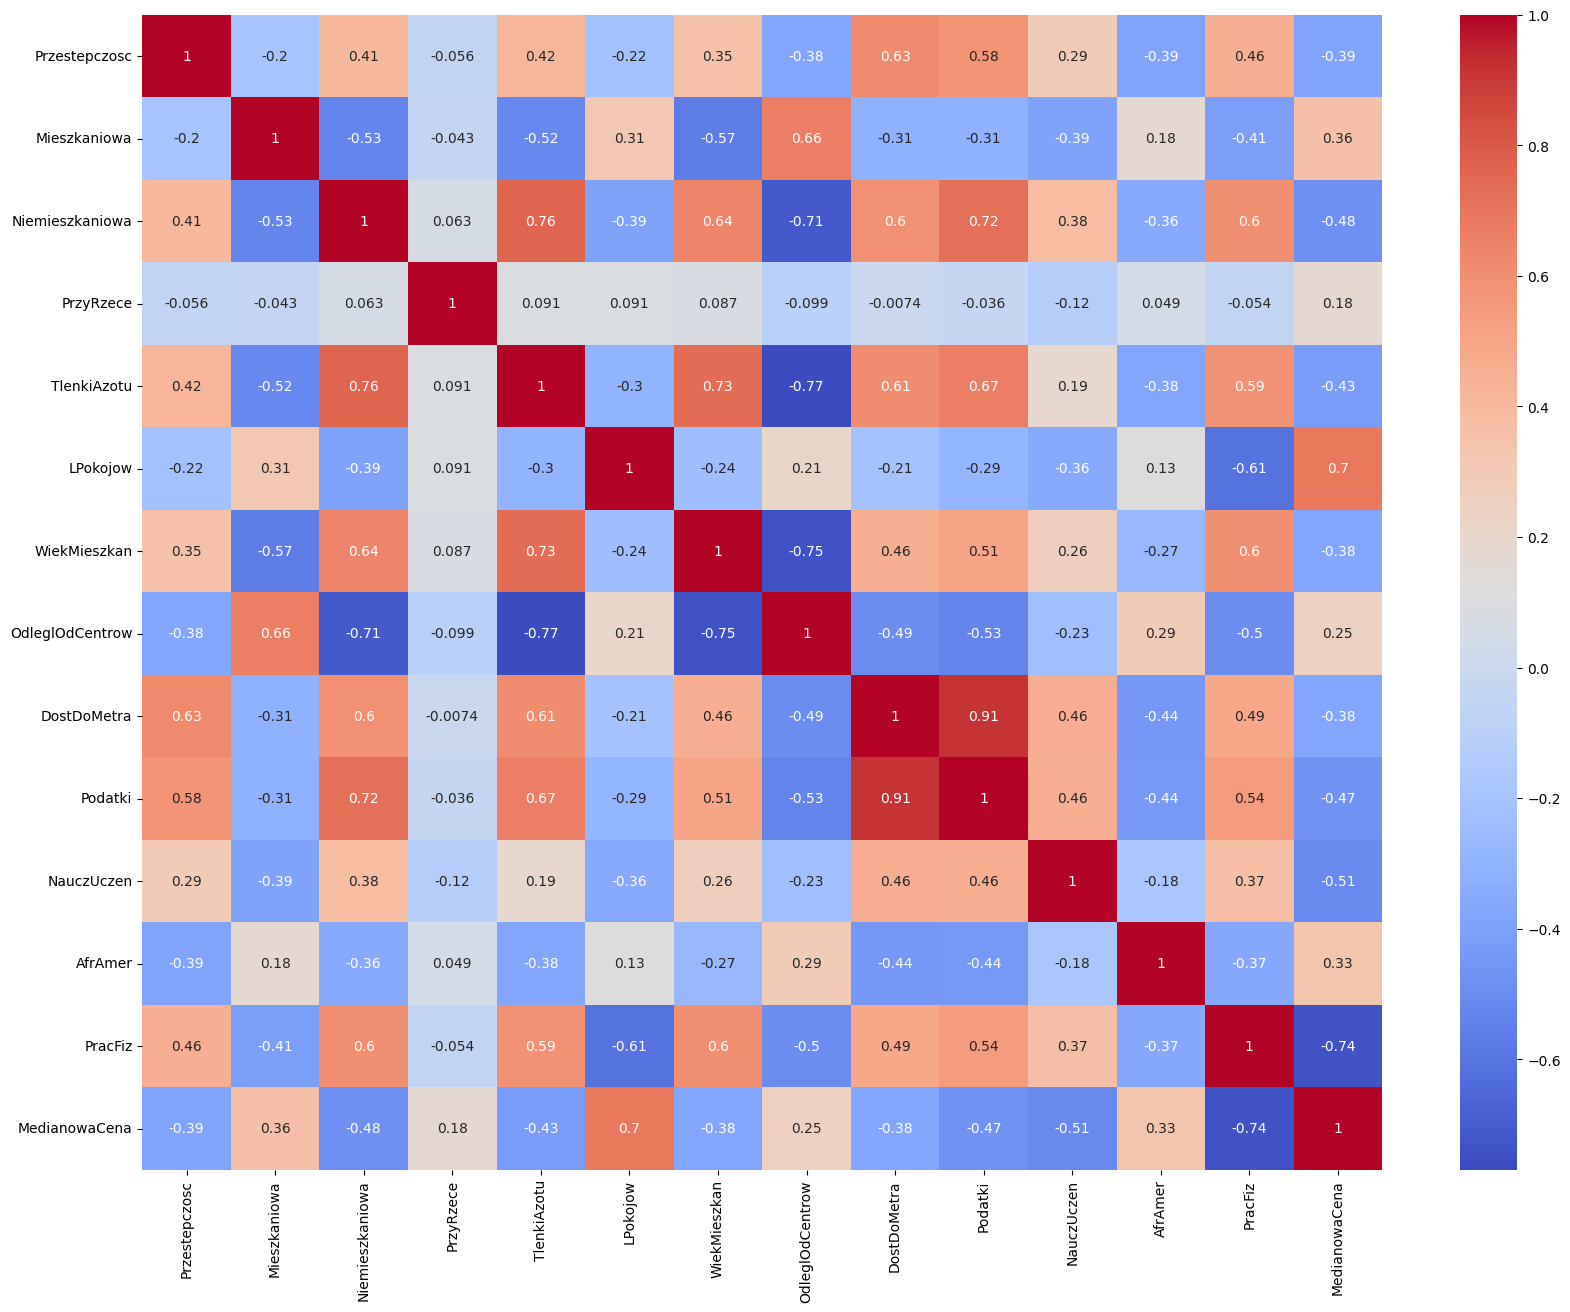

In [131]:
matrix_corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')
plt.show()

Na wykresie da się zauważyć, że cecha *PrzyRzece* nie jest silnie skorelowana z żadną inną cechą. Dlatego warto ją wykluczyć z uczenia.

Pozostaje nam teraz podział zbioru na zmienne niezależne oraz zmienne zależne. Dodatkowo zamieniamy typy danych na **float** dla wszystkich kolumn.

In [132]:
x = df.drop(columns=["MedianowaCena", "PrzyRzece"]).astype(np.float64)
y = df["MedianowaCena"]

## Uczenie modelu

Za pomocą funkcji **train_test_split** dzielimy dane na zbiór treningowy i testowy. Następnie obliczamy współczynniki regresji.

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
model = LinearRegression().fit(x_train, y_train)

regresja = "y = "
for i, beta in enumerate(model.coef_):
    regresja += f" {beta} * x{i} +"
regresja += f" {model.intercept_}"
print(regresja)

y =  -0.1283786671475202 * x0 + 0.05814390816272844 * x1 + 0.10606356040458928 * x2 + -17.178718909652773 * x3 + 3.5279048181148127 * x4 + -0.0014035984046714333 * x5 + -1.6019003122772313 * x6 + 0.2832047138005287 * x7 + -0.011777948484283401 * x8 + -1.1608799978327686 * x9 + 0.007655092383265293 * x10 + -0.6045374707776093 * x11 + 43.22528049917014


Do tak otrzymanego wzoru mogę podstawiać nowe cechy, i obliczać przybliżoną wartość domu.

## Mierzenie skuteczności modelu

Do oceny regresji wykorzystywane są następujące współczynniki:

**Współczynnik determinacji R²**: mierzy jak dobrze model wyjaśnia zmienność danych. Przyjmuje wartości od 0 do 1, gdzie 0 oznacza brak wyjaśniania zmienności, a 1 idealne dopasowanie do danych.
$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

**Błąd średniokwadratowy (Mean Squared Error)**: mierzy średnią kwadratową różnicę między rzeczywistymi wartościami a przewidywanymi. Im mniejszy MSE, tym lepszy model.
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**Błąd średniabsolutny (Mean Absolute Error)**: mierzy średnią wartość bezwzględnych różnic między rzeczywistymi a przewidywanymi wartościami. Jest to mniej wrażliwe na duże błędy niż MSE.
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

**Błąd średniokwadratowy z pierwiastkiem**: pierwiastek kwadratowy z MSE, co sprawia, że jednostka błędu jest taka sama jak jednostka zmiennej zależnej (czyli wartości, które model próbuje przewidzieć).
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$


In [134]:
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"Współczynnik determinacji R²: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Błąd średniokwadratowy: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Błąd średniabsolutny: {mae:.2f}")

rmse = np.sqrt(mse)
print(f"Błąd średniokwadratowy z pierwiastkiem: {rmse:.2f}")

Współczynnik determinacji R²: 0.6662
Błąd średniokwadratowy: 25.31
Błąd średniabsolutny: 3.63
Błąd średniokwadratowy z pierwiastkiem: 5.03
